In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import itertools

In [2]:
# On importe le csv previous_application
df = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_Originaux/previous_application.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# On séléctionne toutes les colonnes qui nous intéressent

df = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_Originaux/previous_application.csv')[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_APPLICATION','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_GOODS_CATEGORY']]


df.rename(columns={'SK_ID_PREV': 'id_credit',  
                    'SK_ID_CURR':'id_client',
                    'NAME_CONTRACT_TYPE':'type_credit',
                    'AMT_APPLICATION':'montant_demande_credit',
                    'AMT_GOODS_PRICE':'montant_credit_accorde',
                    'NAME_CONTRACT_STATUS':'statut_contrat',
                    'DAYS_DECISION':'nombre_jours_decision',
                    'NAME_PAYMENT_TYPE':'moyen_de_paiement',
                    'CODE_REJECT_REASON':'raison_rejet',
                    'NAME_GOODS_CATEGORY': 'type_bien'}, inplace=True)


pd.set_option('display.max_columns',None)
df.head()

,id_credit,id_client,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_jours_decision,moyen_de_paiement,raison_rejet,type_bien
0,2030495,271877,Consumer loans,17145.0,17145.0,Approved,-73,Cash through the bank,XAP,Mobile
1,2802425,108129,Cash loans,607500.0,607500.0,Approved,-164,XNA,XAP,XNA
2,2523466,122040,Cash loans,112500.0,112500.0,Approved,-301,Cash through the bank,XAP,XNA
3,2819243,176158,Cash loans,450000.0,450000.0,Approved,-512,Cash through the bank,XAP,XNA
4,1784265,202054,Cash loans,337500.0,337500.0,Refused,-781,Cash through the bank,HC,XNA


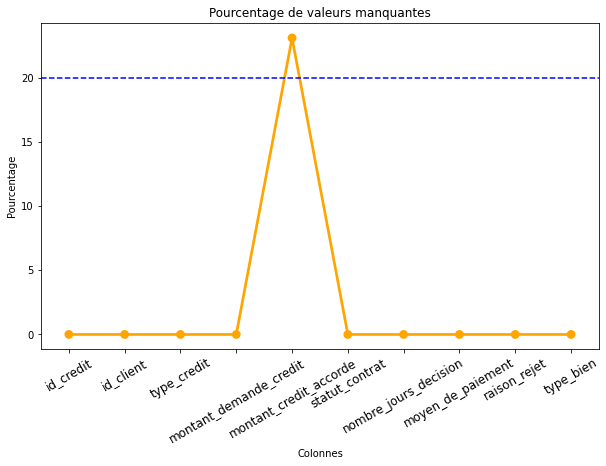

In [4]:
# Graphique qui illustre le pourcentage de valeurs nullles au desu de 20%

null = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null.columns = ['Column Name', 'Pourcentage']
fig = plt.figure(figsize=(10,6))
ax = sns.pointplot(x="Column Name",y="Pourcentage",data=null,color ='orange')
plt.xticks(rotation =30,fontsize =12)
ax.axhline(20, ls='--',color='blue')
plt.title("Pourcentage de valeurs manquantes")
plt.ylabel("Pourcentage")
plt.xlabel("Colonnes")
plt.show()

In [5]:
# On compte les valeurs distinctes dans la colonne type_bien
df['type_credit'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: type_credit, dtype: int64

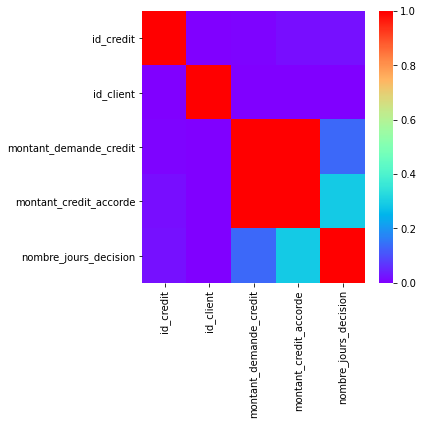

In [6]:
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(5, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

/Users/p-asalisbury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/p-asalisbury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/p-asalisbury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

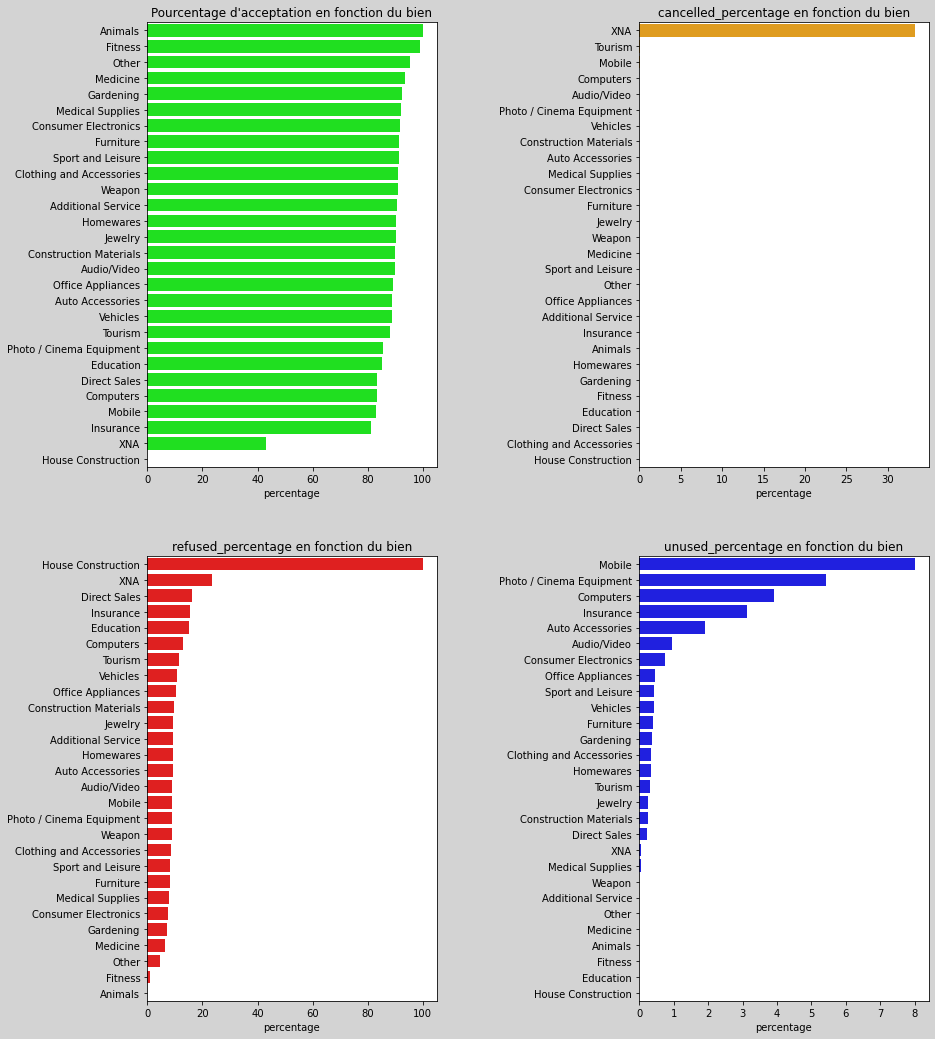

In [7]:
df[["type_bien","statut_contrat"]]
purpose = pd.crosstab(df["type_bien"],df["statut_contrat"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["statut_contrat"] = purpose_new["statut_contrat"].replace({"a":"Pourcentage d'acceptation","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unused_percentage"})

lst = purpose_new["statut_contrat"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["statut_contrat"] == i]
    ax = sns.barplot(0,"type_bien",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" en fonction du bien")
    plt.subplots_adjust(wspace = .7)
    ax.set_facecolor("w")

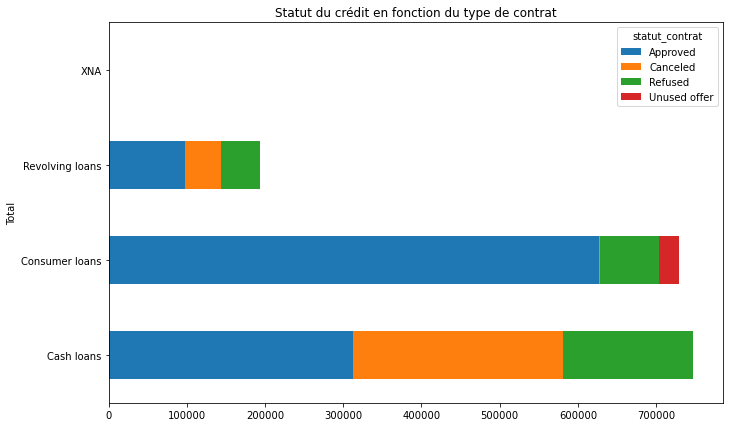

In [8]:
ax = pd.crosstab(df["type_credit"],df["statut_contrat"]).plot(kind="barh",figsize=(11,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("Total")
plt.title("Statut du crédit en fonction du type de contrat")
ax.set_facecolor("w")

In [9]:
# On vérifie le pourcentage de valeurs manquantes par colonnne
round(df.isnull().sum() / df.shape[0] * 100,2)

id_credit                  0.00
id_client                  0.00
type_credit                0.00
montant_demande_credit     0.00
montant_credit_accorde    23.08
statut_contrat             0.00
nombre_jours_decision      0.00
moyen_de_paiement          0.00
raison_rejet               0.00
type_bien                  0.00
dtype: float64

In [10]:
# On peut supprimer les NaN dans montant_credit_accorde. On a un df initial avec 1,6 million d'entrées
df = df.dropna(subset=['montant_credit_accorde'])

In [11]:
# On vérifie toutes les données uniques dans la colonne statut_contrat
print(df['statut_contrat'].unique())

['Approved' 'Refused' 'Unused offer' 'Canceled']


In [12]:
print(df['moyen_de_paiement'].unique())

['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']


In [13]:
print(df['raison_rejet'].unique())

['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']


In [14]:
# On cherche à remplacer les variables discètes par des variables numériques (continues)
# Plus tard il sera plus facile de faire des corrélations
# Lorsqu'on fera de la visualisation, on pourra faire un mapping inverse


df.statut_contrat=df.statut_contrat.replace(['Approved','Refused','Unused offer','Canceled'],[0,1,2,3])
df.moyen_de_paiement=df.moyen_de_paiement.replace(['Cash through the bank','XNA','Non-cash from your account','Cashless from the account of the employer'],[0,1,2,3])
df.raison_rejet=df.raison_rejet.replace(['XAP','HC','LIMIT','CLIENT','SCOFR','SCO','XNA','VERIF','SYSTEM'],[0,1,2,3,4,5,6,7,8])
df.type_bien=df.type_bien.replace(['XNA','Mobile','Consumer Electronics','Computers','Audio/Video','Furniture','Photo / Cinema Equipment','Construction Materials','Clothing and Accessories','Auto Accessories','Jewelry','Homewares','Medical Supplies','Vehicles','Sport and Leisure','Gardening','Other','Office Appliances','Tourism','Medicine','Direct Sales','Fitness','Additional Service','Education','Weapon','Insurance','Animals','House Construction'],[0,3,7,3,7,2,7,2,6,5,1,2,4,5,8,2,9,2,9,4,9,8,9,9,9,9,9,2])
df.type_credit=df.type_credit.replace(['Consumer loans','Cash loans','Revolving loans'],[0,1,2])

df.head(15)

,id_credit,id_client,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_jours_decision,moyen_de_paiement,raison_rejet,type_bien
0,2030495,271877,0,17145.0,17145.0,0,-73,0,0,3
1,2802425,108129,1,607500.0,607500.0,0,-164,1,0,0
2,2523466,122040,1,112500.0,112500.0,0,-301,0,0,0
3,2819243,176158,1,450000.0,450000.0,0,-512,0,0,0
4,1784265,202054,1,337500.0,337500.0,1,-781,0,1,0
5,1383531,199383,1,315000.0,315000.0,0,-684,0,0,0
10,1715995,447712,1,270000.0,270000.0,0,-735,0,0,0
11,2257824,161140,1,211500.0,211500.0,0,-815,0,0,0
12,2330894,258628,1,148500.0,148500.0,0,-860,0,0,0
13,1397919,321676,0,53779.5,53779.5,0,-408,0,0,7


In [15]:
# On prend la valeur absolue des éléments de la colonne nombre_jours_décision
# On convertit aussi les jours en mois 
# Enfin, on convertit les nombres décimaux en entiers. 

df['nombre_jours_decision']=abs(df['nombre_jours_decision']/30)
df['montant_demande_credit']=df['montant_demande_credit'].astype(int)
df['montant_credit_accorde']=df['montant_credit_accorde'].astype(int)

In [16]:
# On renomme la colonne transformée
df.rename(columns={'nombre_jours_decision': 'nombre_mois_decision'}, inplace=True)

In [17]:
df['nombre_mois_decision'] = df['nombre_mois_decision'].astype(int)

In [18]:
df.dtypes

id_credit                 int64
id_client                 int64
type_credit               int64
montant_demande_credit    int64
montant_credit_accorde    int64
statut_contrat            int64
nombre_mois_decision      int64
moyen_de_paiement         int64
raison_rejet              int64
type_bien                 int64
dtype: object

In [19]:
df.head()

,id_credit,id_client,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,type_bien
0,2030495,271877,0,17145,17145,0,2,0,0,3
1,2802425,108129,1,607500,607500,0,5,1,0,0
2,2523466,122040,1,112500,112500,0,10,0,0,0
3,2819243,176158,1,450000,450000,0,17,0,0,0
4,1784265,202054,1,337500,337500,1,26,0,1,0


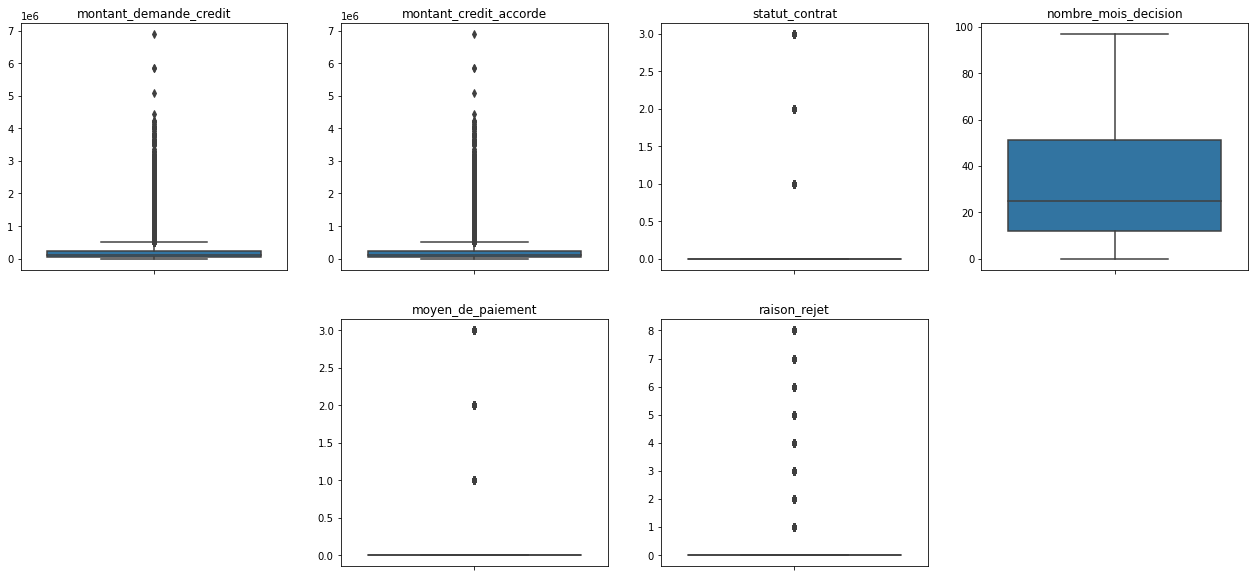

In [20]:
# On cherche les valeurs abéantes 

plt.figure(figsize=(22,10))

app_outlier_col_1 = ['montant_demande_credit','montant_credit_accorde','statut_contrat','nombre_mois_decision']
app_outlier_col_2 = ['moyen_de_paiement','raison_rejet']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
    
# iIl n'y a pas de valeurs abérantes 

In [21]:
df.shape

(1284699, 10)

In [22]:
df.describe()

,id_credit,id_client,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,type_bien
count,1.284699e+06,1.284699e+06,1.284699e+06,1.284699e+06,1.284699e+06,1.284699e+06,1.284699e+06,1.284699e+06,1.284699e+06,1.284699e+06
mean,1.914712e+06,2.783550e+05,5.061372e-01,2.278183e+05,2.278472e+05,2.636275e-01,3.354843e+01,2.035574e-01,4.670409e-01,2.479051e+00
std,5.339403e+05,1.027937e+05,6.286937e-01,3.153781e+05,3.153966e+05,5.343008e-01,2.605930e+01,4.241981e-01,1.146315e+00,2.692121e+00
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.448564e+06,1.893570e+05,0.000000e+00,5.084100e+04,5.084100e+04,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.911250e+06,2.787520e+05,0.000000e+00,1.123200e+05,1.123200e+05,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,2.000000e+00
75%,2.378434e+06,3.673930e+05,1.000000e+00,2.340000e+05,2.340000e+05,0.000000e+00,5.100000e+01,0.000000e+00,0.000000e+00,3.000000e+00
max,2.845382e+06,4.562550e+05,2.000000e+00,6.905160e+06,6.905160e+06,3.000000e+00,9.700000e+01,3.000000e+00,8.000000e+00,9.000000e+00


In [23]:
# On crée une fonction pour tracer des "countplots" répétitifs en analyse univariée sur df
# Cette fonction est divisée en deux sous-parcelles :
# 1. Comptage de la colonne catégorielle par rapport à la cible ;
# 2. Pourcentage de défaillants dans la colonne

def univariee(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = df1[feature].value_counts()
    df2 = pd.DataFrame({feature: temp.index,'Nombre de contrats': temp.values})

    # On calcule le pourcentage de cible=1 par valeur de catégorie
    cat_perc = df1[[feature, 'id_client']].groupby([feature],as_index=False).mean()
    cat_perc["id_client"] = cat_perc["id_client"]*100
    cat_perc.sort_values(by='id_client', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
        
    # 1. Sous-parcelle 1 : courbe de comptage de la colonne 
    # sns.set_palette("Set2")
    
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df1,
                    hue ="id_client",
                    order=cat_perc[feature],
                    palette=['blue','orange'])
    
    
    # Définir un style commun

    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['En règle','Défectueux'])
    
    # Si le tracé n'est pas lisible, utilisez l'échelle logarithmique.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Compte (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    
    # 2. Sous-parcelle 2 : Pourcentage de défaillants dans la colonne 
    s = sns.barplot(ax=ax2, 
                   
                    x = feature, 
                    y='id_client', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Pourcentage de défectueux [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Défectueux %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [24]:
# On vérifie le défaut de paiement en fonction du niveau d'étude
univariee('type_credit',True,True,True)

NameError: name 'df1' is not defined

In [61]:
import csv
df1.to_csv('CREDIT_MySQL.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

In [59]:
df1.head()

,id_credit,id_client,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,type_bien
0,2030495,271877,0,17145,17145,0,2,0,0,3
1,2802425,108129,1,607500,607500,0,5,1,0,0
2,2523466,122040,1,112500,112500,0,10,0,0,0
3,2819243,176158,1,450000,450000,0,17,0,0,0
4,1784265,202054,1,337500,337500,1,26,0,1,0


In [60]:
# On vérifie que les valeur dans id_credit sont bien des valeurs uniques
item_counts = df1["id_credit"].value_counts(normalize=True)
print(item_counts)

2099199    7.783924e-07
1761802    7.783924e-07
2447869    7.783924e-07
2441726    7.783924e-07
1747459    7.783924e-07
               ...     
1007426    7.783924e-07
1005379    7.783924e-07
1013575    7.783924e-07
1036112    7.783924e-07
2097152    7.783924e-07
Name: id_credit, Length: 1284699, dtype: float64
